In [0]:
!pip install opencv-python


^C


In [0]:
from keras import backend as K
import time
from multiprocessing.dummy import Pool
K.set_image_data_format('channels_first')
import cv2
import os
import glob
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
import matplotlib.pyplot as plt

from keras.layers.normalization import BatchNormalization
from keras.layers.core import Lambda, Flatten, Dense
%matplotlib inline

Using TensorFlow backend.


In [0]:
def faceDetection(test_img):
    gray_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)#convert color image to grayscale
    face_haar_cascade=cv2.CascadeClassifier('C:/tensorflow1/MP/haarcascade_frontalface_default.xml')#Load haar classifier
    faces=face_haar_cascade.detectMultiScale(gray_img,scaleFactor=1.32,minNeighbors=5)#detectMultiScale returns rectangles

    return faces,test_img
def labels_for_training_data(directory):
    faces=[]
    faceID=[]

    for path,subdirnames,filenames in os.walk(directory):
        for filename in filenames:
            if filename.startswith("."):
                print("Skipping system file")#Skipping files that startwith .
                continue

            id=os.path.basename(path)#fetching subdirectory names
            img_path=os.path.join(path,filename)#fetching image path
            #print("img_path:",img_path)
            #print("id:",id)
            test_img=cv2.imread(img_path)#loading each image one by one
            if test_img is None:
                print("Image not loaded properly")
                continue
            faces_rect,gray_img=faceDetection(test_img)#Calling faceDetection function to return faces detected in particular image
            if len(faces_rect)!=1:
               continue #Since we are assuming only single person images are being fed to classifier
            (x,y,w,h)=faces_rect[0]
            roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from grayscale image
            faces.append(roi_gray)
            faceID.append((id))
    return faces,faceID

In [0]:
facess, faceID = labels_for_training_data('C:/1_Jay/Dataset/newd/')

In [0]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(faceID)
encoded_Y = encoder.transform(faceID)
# convert integers to dummy variablefs (i.e. one hot encoded)
labelss = to_categorical(encoded_Y)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(facess, labelss, test_size=0.2)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.1)

104
372
372
104
(147, 147, 3)


7

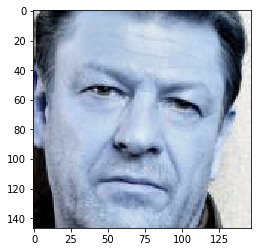

In [0]:

print(len(x_test))
print(len(x_train))
print(len(y_train))
print(len(y_test))
print(x_train[0].shape)
plt.imshow(x_train[0])
np.argmax(y_train[0])

In [0]:
def resize_shape(xx):
  for i in range(len(xx)):
    xx[i] = cv2.resize(xx[i],(96,96))
    xx[i] = np.moveaxis(xx[i],-1,0)
  return xx;

In [0]:
x_train = resize_shape(x_train)
x_test = resize_shape(x_test)
x_val = resize_shape(x_val)
print(x_train[0].shape)

(3, 96, 96)


In [0]:
!pip install keras_vggface

  Running setup.py bdist_wheel for keras-vggface ... - \ done
  Stored in directory: /root/.cache/pip/wheels/72/aa/01/eb7baeb2f6e2d2f0d2aabddb5f01d57fa22fbd019ee2799bf5
Successfully built keras-vggface


In [0]:
from keras.engine import  Model
from keras.layers import Flatten, Dense, Input, Dropout
from keras_vggface.vggface import VGGFace
from keras.optimizers import Adam,SGD

#custom parameters
nb_class = 12
hidden_dim = 2048

vgg_model = VGGFace(include_top=False, input_shape=(3,96,96))
vgg_model.trainable = True
for layer in vgg_model.layers:
  if layer.name == 'conv5_3':
    break;
  else:
    layer.trainable = False
last_layer = vgg_model.get_layer('pool5').output
x = Flatten(name='flatten')(last_layer)
x = Dense(hidden_dim, activation='relu', name='fc6')(x)
x = Dropout(0.5)(x)
x = Dense(hidden_dim, activation='relu', name='fc7')(x)
out = Dense(nb_class, activation='softmax', name='fc8')(x)
custom_vgg_model = Model(vgg_model.input, out)

In [0]:
from keras.models import model_from_json
with open('C:/tensorflow1/MP/newd/minitrial1.json','r') as f:
    model = model_from_json(f.read())
#vgg = load_model('C:/Users/Jay/Downloads/vggmodel16.h5')

In [0]:
#model.load_weights('C:/Users/Jay/Downloads/vggmodel16.h5')
model.load_weights('C:/tensorflow1/MP/newd/mini_trial1model.h5')


In [0]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr = 1e-5), loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
np.max(model.predict(np.array(x_test[0]).reshape(1,3,96,96)))

1.0

In [0]:
model.evaluate(np.array(x_test),np.array(y_test))

415/415 [==============================] - 224s 539ms/step


[0.89652634620083027, 0.94216867268803606]

In [0]:
def id_predict(ind):
    if ind == 0:
        return 'Bill Gates'
    elif ind == 1:
        return 'Elon Musk'
    elif ind == 2:
        return 'Jeff Bezos'
    elif ind == 3:
        return 'Mark Zuckerberg'
    elif ind == 4:
        return 'Natalie Portman'
    elif ind == 5:
        return 'Rowan Atkinson'
    elif ind == 6:
        return 'Samuel_Jackson'
    elif ind == 7:
        return 'Sean Bean'
    elif ind == 8:
        return 'Steve Jobs'
    elif ind== 9:
        return 'Warren Buffet'
    elif ind== 11:
        return 'Gowtham'
    elif ind==10:
        return 'Jayaraman'
    elif ind == 99:
        return 'Unknown'

In [0]:

faceCascade = cv2.CascadeClassifier('C:/tensorflow1/MP/newd/haarcascade_frontalface_default.xml')

video_capture = cv2.VideoCapture(0)

while True:
    inp = []
    ret, frame = video_capture.read()

    face_rect,fram = faceDetection(frame)

    # Draw a rectangle around the faces
    for i in range(len(face_rect)):
        (x,y,w,h)=face_rect[i]
        roi =fram[y:y+w,x:x+h]
        inp.append(roi)
    inp = resize_shape(inp)
    #for (x, y, w, h) in face_rect:
     #   cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
       
    #inp = resize_shape(inp)
    # Display the resulting frame
    for i in range(len(inp)):
        (x,y,w,h) = face_rect[i]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 0), 2)
        temp = (model.predict(np.array(inp[i]).reshape(1,3,96,96)))  
        prob = np.max(temp)
        print(prob)
        if prob > 0.99:
            predict = np.argmax(temp)
        else:
            predict = 99
        
        cv2.putText(fram,id_predict(predict),(x,y+h+15),cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 2)
        
    cv2.imshow('Video', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

In [0]:
np.array(inp).shape
import time

In [0]:

faceCascade = cv2.CascadeClassifier('C:/tensorflow1/MP/newd/haarcascade_frontalface_default.xml')

video_capture = cv2.VideoCapture('C:/tensorflow1/MP/Elon Musk Meets Iron Man 2.mp4')
frame_width = int(video_capture.get(3))
frame_height = int(video_capture.get(4))
while (video_capture.isOpened()):
    inp = []
    ret, frame = video_capture.read()

    face_rect,fram = faceDetection(frame)

    # Draw a rectangle around the faces
    for i in range(len(face_rect)):
        (x,y,w,h)=face_rect[i]
        roi =fram[y:y+w,x:x+h]
        inp.append(roi)
    inp = resize_shape(inp)
    for (x, y, w, h) in face_rect:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
       
    #inp = resize_shape(inp)
   # Display the resulting frame
    for i in range(len(inp)):
        (x,y,w,h) = face_rect[i]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 0), 2)
        temp = (model.predict(np.array(inp[i]).reshape(1,3,96,96)))  
        prob = np.max(temp)
        #print(prob)
        if prob > 0.99:
            predict = np.argmax(temp)
        else:
            predict = 99
        
        cv2.putText(fram,id_predict(predict),(x,y+h+15),cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255), 1)
        
    cv2.imshow('Video', frame)
    out = cv2.VideoWriter('output.avi',cv2.VideoWriter.fourcc('M','J','P','G'),10,(frame_width,frame_height))
   
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
out.release()
cv2.destroyAllWindows()

0.999999
1
1.0
1


True

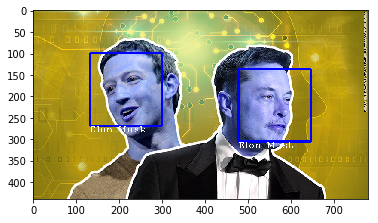

In [0]:

from PIL import Image
frame=cv2.imread("C:/Users/Admin/Pictures/Saved Pictures/4.jpg")


inp=[]
face_rect,fram = faceDetection(frame)

    # Draw a rectangle around the faces
for i in range(len(face_rect)):
        (x,y,w,h)=face_rect[i]
        roi =fram[y:y+w,x:x+h]
        inp.append(roi)
inp = resize_shape(inp)
    #for (x, y, w, h) in face_rect:
     #   cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
       
    #inp = resize_shape(inp)
    # Display the resulting frame
for i in range(len(inp)):
        (x,y,w,h) = face_rect[i]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 3)
        temp = (model.predict(np.array(inp[i]).reshape(1,3,96,96)))  
        prob = np.max(temp)
        print(prob)
        if prob > 0.99:
            predict = np.argmax(temp)
        else:
            predict = 99
        print (predict)
        cv2.putText(fram,id_predict(predict),(x,y+h+15),cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,255), 1)
        
plt.imshow(fram)
cv2.imwrite("1g.jpg",fram)
